# EDA Proyect

## Índice


## 1. Hipóteis

Este proyecto trata de analizar la variación en los patrones de lluvia y viento en Australia y la relación entre ambos fenomenos.
Se tratará de afirmar la hipótesis de que los patrones del viento y lluvia han variado a lo largo del tiempo.


## 2. Librerías y Limpieza

### 2.1. Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot

%matplotlib inline

### 2.2. Limpieza

In [2]:
# Lectura del .csv
# Se utilizan las fechas como índices para facilitar la manipulación de los datos.
aus_df = pd.read_csv('../data/weatherAUS.csv', encoding='latin1', parse_dates=True, index_col=0)
aus_df.head().append(aus_df.tail())

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Los datos en 2008 comienzan en didiembre, y los últimos datos de 2017 son de junio. Para facilitar el cálculo, descartamos estos datos de los años incompletos.

In [3]:
aus_df = aus_df[(aus_df.index>'2009') & (aus_df.index<'2017')]
aus_df.head().append(aus_df.tail())

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,SSW,...,44.0,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,No,No
2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,E,...,43.0,22.0,1018.7,1014.8,NaN,NaN,17.1,26.5,No,No
2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,NW,...,41.0,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,No,No
2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,NW,...,41.0,9.0,1012.6,1009.2,NaN,NaN,22.4,34.4,No,No
2009-01-06,Albury,13.7,37.9,0.0,NaN,NaN,W,52.0,SE,WNW,...,33.0,8.0,1010.9,1006.7,NaN,NaN,23.1,36.8,No,No
2016-12-27,Uluru,22.1,35.8,63.8,NaN,NaN,WNW,43.0,WNW,W,...,77.0,41.0,997.8,995.2,4.0,2.0,26.0,33.5,Yes,No
2016-12-28,Uluru,22.6,36.8,0.0,NaN,NaN,NW,50.0,NW,W,...,63.0,39.0,1000.0,998.8,NaN,NaN,29.7,34.0,No,No
2016-12-29,Uluru,23.2,38.0,0.0,NaN,NaN,SSW,33.0,S,WSW,...,25.0,14.0,1004.4,1001.0,NaN,NaN,28.7,36.4,No,No
2016-12-30,Uluru,19.7,37.0,0.0,NaN,NaN,E,37.0,ESE,W,...,30.0,23.0,1004.6,1000.9,NaN,NaN,28.2,35.1,No,No


In [4]:
# Para obtener algo más de información sobre lo que estos datos son capaces de contar, se realiza un .describe()
# y un .info()
aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,133093.000000,133289.000000,131377.000000,77780.000000,71357.000000,125194.000000,132773.000000,131780.000000,131963.000000,130574.000000,120384.000000,120419.000000,83002.000000,80223.000000,132766.000000,131403.000000
mean,12.091208,23.108702,2.354695,5.448348,7.602950,40.166342,14.117644,18.737502,68.790744,51.564975,1017.649175,1015.254287,4.419893,4.501178,16.910256,21.581881
std,6.373165,7.116540,8.480137,4.193269,3.788933,13.648392,8.955035,8.845154,19.077064,20.826832,7.080324,7.011885,2.886544,2.716320,6.478110,6.934902
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.200000,16.500000
50%,11.900000,22.500000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.600000,21.000000
75%,16.700000,28.100000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.300000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [5]:
print('Tamaño del dataset: ', aus_df.shape, '\n\n')
aus_df.info()

Tamaño del dataset:  (134460, 22) 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134460 entries, 2009-01-02 to 2016-12-31
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       134460 non-null  object 
 1   MinTemp        133093 non-null  float64
 2   MaxTemp        133289 non-null  float64
 3   Rainfall       131377 non-null  float64
 4   Evaporation    77780 non-null   float64
 5   Sunshine       71357 non-null   float64
 6   WindGustDir    125132 non-null  object 
 7   WindGustSpeed  125194 non-null  float64
 8   WindDir9am     124596 non-null  object 
 9   WindDir3pm     130663 non-null  object 
 10  WindSpeed9am   132773 non-null  float64
 11  WindSpeed3pm   131780 non-null  float64
 12  Humidity9am    131963 non-null  float64
 13  Humidity3pm    130574 non-null  float64
 14  Pressure9am    120384 non-null  float64
 15  Pressure3pm    120419 non-null  float64
 16  Cloud9am       83002 

Puede observarse que el dataset cuenta con 145460 filas y 22 columnas.
<br>
También se observa la presencia de nulos en diferentes columnas. Vemos su distribución a continuación:

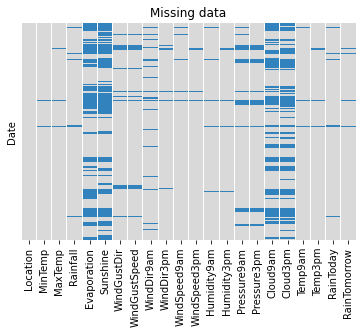

In [6]:
sns.heatmap(aus_df.isnull(), yticklabels = False, cbar = False, cmap='tab20c_r')
plt.title('Missing data');

In [7]:
# Como complemento al gráfico, se crea un dataframe para obtener datos numéricos sobre la distribución de los missing data.
# Los indices de este dataframe son las columnas de aus_df.
# La primera columna muestra el número total de nulos, y la segunda, el porcentaje respecto al numero total de filas.
pd.DataFrame({'Nuls':pd.Series(aus_df.isnull().sum()).sort_values(ascending = False),
              '%': round((pd.Series(aus_df.isnull().sum()).sort_values(ascending = False)/aus_df.shape[0])*100, 2)})

,Nuls,%
Sunshine,63103,46.93
Evaporation,56680,42.15
Cloud3pm,54237,40.34
Cloud9am,51458,38.27
Pressure9am,14076,10.47
Pressure3pm,14041,10.44
WindDir9am,9864,7.34
WindGustDir,9328,6.94
WindGustSpeed,9266,6.89
Humidity3pm,3886,2.89


Con el gráfico y el DataFrame generados, se observan gran cantidad de nulos en las siguientes columnas:
* Sunshine
* Evaporation
* Cloud3pm
* Cloud9am

Ninguna de estas columnas se tendrán en cuenta para el desarrollo del EDA.

In [8]:
# Columnas del dataframe (.info() ya ofrece esa información)
cols_aus_df = aus_df.columns
cols_aus_df

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## 3. Zonas en las que se ha llevado a cabo la recogida de los datos

In [9]:
meassure_locs = aus_df.Location.unique().tolist()
print(meassure_locs)
len(meassure_locs) # Para conocer el número total de localidades

['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


49

In [10]:
print('Data collection takes place between', aus_df.index.min().day,
      aus_df.index.min().month_name(),  aus_df.index.min().year, 'and ',
      aus_df.index.max().day,  aus_df.index.max().month_name(), aus_df.index.max().year)

Data collection takes place between 2 January 2009 and  31 December 2016


Es bueno también, conocer el número mediciones por localización:

In [11]:
# Se añaden las columnas de Year y Month
aus_df['Year'] = aus_df.index.year
aus_df['Month'] = aus_df.index.month

#Se binarizan las columnas de 'RainToday' y 'RainTomorrow'
aus_df.loc[aus_df['RainToday']=='Yes','RainToday'] = 1
aus_df.loc[aus_df['RainToday']=='No','RainToday'] = 0
aus_df.loc[aus_df['RainTomorrow']=='Yes','RainTomorrow'] = 1
aus_df.loc[aus_df['RainTomorrow']=='No','RainTomorrow'] = 0

aus_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,SSW,...,1014.4,1013.1,NaN,NaN,14.9,22.1,0,0,2009,1
2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,E,...,1018.7,1014.8,NaN,NaN,17.1,26.5,0,0,2009,1
2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,NW,...,1015.1,1010.3,NaN,NaN,20.7,33.9,0,0,2009,1
2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,NW,...,1012.6,1009.2,NaN,NaN,22.4,34.4,0,0,2009,1
2009-01-06,Albury,13.7,37.9,0.0,NaN,NaN,W,52.0,SE,WNW,...,1010.9,1006.7,NaN,NaN,23.1,36.8,0,0,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,Uluru,22.1,35.8,63.8,NaN,NaN,WNW,43.0,WNW,W,...,997.8,995.2,4.0,2.0,26.0,33.5,1,0,2016,12
2016-12-28,Uluru,22.6,36.8,0.0,NaN,NaN,NW,50.0,NW,W,...,1000.0,998.8,NaN,NaN,29.7,34.0,0,0,2016,12
2016-12-29,Uluru,23.2,38.0,0.0,NaN,NaN,SSW,33.0,S,WSW,...,1004.4,1001.0,NaN,NaN,28.7,36.4,0,0,2016,12


In [12]:
measures_df = aus_df.groupby('Location').count()[['Year']].sort_values(by = 'Year')
measures_df.head().append(measures_df.tail())
# Se muestran las 5 localidades con menor y mayor número de medidas
# Se muestra solo esta columna porque no contiene nulos.

,Year
Location,
Nhil,1402
Katherine,1402
Uluru,1402
SalmonGums,2824
NorahHead,2827
Mildura,2832
Moree,2832
MountGambier,2832
Wollongong,2832


Como se observa, existen localidades con menos de la mitad de medidas que los lugares que cuentan con mayor número de ellas.


In [13]:
# Cuanto cuantos registros de días de lluvia existen en el df
print('Número de días en los que se registra precipitación\n', aus_df.RainToday.value_counts(), '\n')
print('Número de días en los que se registra precipitación al día siguiente\n',aus_df.RainTomorrow.value_counts())

Número de días en los que se registra precipitación
 0    101798
1     29579
Name: RainToday, dtype: int64 

Número de días en los que se registra precipitación al día siguiente
 0    101795
1     29580
Name: RainTomorrow, dtype: int64


## 4. Análisis del Viento

* La columna 'WindGustDir' recoge la dirección del viento con mayor velocidad registrada en cada día
* La columna 'WindGustSpeed' recoge los datos de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* La columna 'WindDir9am' recoge la direccón de viento a las 9 de la mañana.
* La columna 'WindDir3pm' recoge la direccón de viento a las 3 de a tarde.


In [14]:
# Direcciones del viento
aus_df['WindGustDir'].unique()

array(['W', 'SSE', 'WNW', 'NE', 'S', 'SW', 'NNW', 'NW', 'SE', 'WSW',
       'NNE', 'N', 'ESE', nan, 'E', 'SSW', 'ENE'], dtype=object)

Con los datos disponibles se puede obtener información sobre la dirección mayoritaria del viento en Australia y por localización

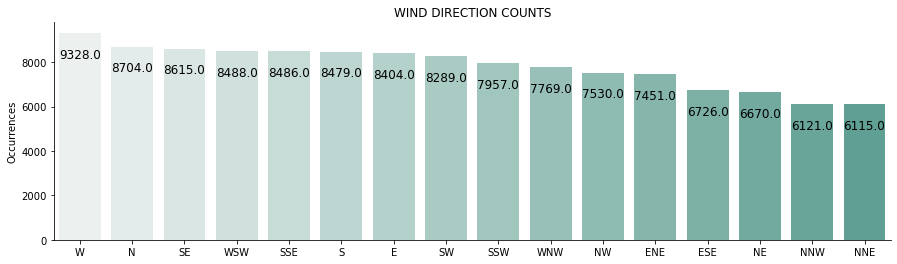

In [15]:
fig_wind_counts, ax = plt.subplots(figsize = (15,4))

ax = sns.barplot(x = aus_df.WindGustDir.value_counts().index,
                 y = aus_df.WindGustDir.value_counts(),
                 palette='light:#5A9')

ax.set(title = 'WIND DIRECTION COUNTS', ylabel = 'Occurrences')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='black', size=12)

    sns.despine()

In [16]:
'''
# Para sacar imagen para la presentación se ha utilizado este código

fig_wind_counts, ax = plt.subplots(figsize = (15,4))

ax = sns.barplot(x = aus_df.WindGustDir.value_counts().index,
                 y = aus_df.WindGustDir.value_counts(),
                 palette='light:#5A9')

# ax.set(title = 'WIND DIRECTION COUNTS', ylabel = 'Occurrences')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='black', size=12)

    sns.despine()

    
    
# Titles and labels
plt.title('WIND DIRECTION COUNT PER DIRECTION', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.ylabel ('Ocurrences', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.xlabel('Wind Direction', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
sns.despine()    
    

#Spines
ax.spines['bottom'].set_color('lightcyan')
ax.spines['left'].set_color('lightcyan')
ax.tick_params(axis='both', colors='lightcyan')

plt.tight_layout()

fig_wind_counts.savefig(fname='../Wind_per_dir.png', transparent=True)
'''

"\n# Para sacar imagen para la presentación se ha utilizado este código\n\nfig_wind_counts, ax = plt.subplots(figsize = (15,4))\n\nax = sns.barplot(x = aus_df.WindGustDir.value_counts().index,\n                 y = aus_df.WindGustDir.value_counts(),\n                 palette='light:#5A9')\n\n# ax.set(title = 'WIND DIRECTION COUNTS', ylabel = 'Occurrences')\n\nfor p in ax.patches:\n    ax.annotate(f'\n{p.get_height()}',\n                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='black', size=12)\n\n    sns.despine()\n\n    \n    \n# Titles and labels\nplt.title('WIND DIRECTION COUNT PER DIRECTION', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})\nplt.ylabel ('Ocurrences', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})\nplt.xlabel('Wind Direction', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})\nsns.despine()    \n    \n\n#Spines\nax.spines['bottom'].set_color('lightcyan')\nax.spines['

Para conocer como se ha comportado el viento cada año, puede hacerse lo siguiente:

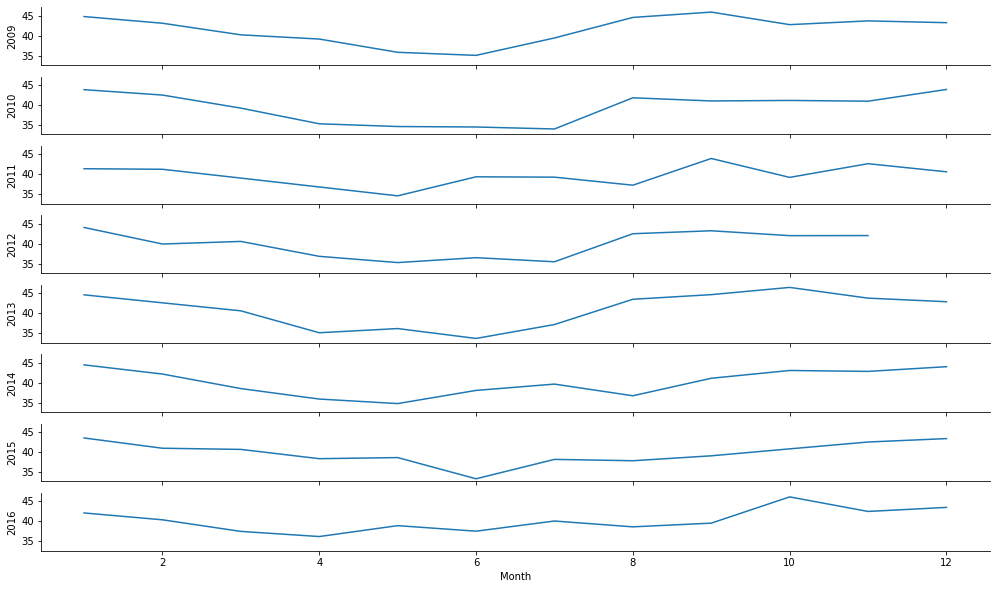

In [17]:
fig_wind_year, ax = plt.subplots(len(range(aus_df.Year.min(),aus_df.Year.max()+1)), figsize = (17,10), sharex=True, sharey = True)

for n, year in enumerate(range(aus_df.Year.min(),aus_df.Year.max()+1)):
    ax[n]=sns.lineplot(x = aus_df.loc[aus_df['Year']==year,'Month'],
                       y = aus_df.loc[aus_df['Year']==year,'WindGustSpeed'],
                       ax=ax[n])
    ax[n].set(ylabel = str(year))
    sns.despine()

In [18]:
'''
# Para sacar la imagen para la presentación:

fig_wind_year, ax = plt.subplots(len(range(aus_df.Year.min(),aus_df.Year.max()+1)), figsize = (17,10),
                                 sharex=True, sharey = True)
#sharey permite que todos muestren el mismo intervalo y sea más fácil comparar

for n, year in enumerate(range(aus_df.Year.min(),aus_df.Year.max()+1)):
    ax[n]=sns.lineplot(x = aus_df.loc[aus_df['Year']==year,'Month'],
                       y = aus_df.loc[aus_df['Year']==year,'WindGustSpeed'],
                       ax=ax[n], color = 'mediumspringgreen', linewidth=3)
    ax[n].set_ylabel(str(year), fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})
    sns.despine()
    ax[n].spines['bottom'].set_color('lightcyan')
    ax[n].spines['left'].set_color('lightcyan')
    ax[n].tick_params(axis='both', colors='lightcyan')
    
plt.suptitle('MAX WIND SPEED', fontdict={'fontsize':8, 'color': 'blue', 'fontweight': 'bold'})
plt.xlabel('Month', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'});

#fig_wind_year.savefig(fname='../fig_wind_year.png', transparent=True)
'''

"\n# Para sacar la imagen para la presentación:\n\nfig_wind_year, ax = plt.subplots(len(range(aus_df.Year.min(),aus_df.Year.max()+1)), figsize = (17,10),\n                                 sharex=True, sharey = True)\n#sharey permite que todos muestren el mismo intervalo y sea más fácil comparar\n\nfor n, year in enumerate(range(aus_df.Year.min(),aus_df.Year.max()+1)):\n    ax[n]=sns.lineplot(x = aus_df.loc[aus_df['Year']==year,'Month'],\n                       y = aus_df.loc[aus_df['Year']==year,'WindGustSpeed'],\n                       ax=ax[n], color = 'mediumspringgreen', linewidth=3)\n    ax[n].set_ylabel(str(year), fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})\n    sns.despine()\n    ax[n].spines['bottom'].set_color('lightcyan')\n    ax[n].spines['left'].set_color('lightcyan')\n    ax[n].tick_params(axis='both', colors='lightcyan')\n    \nplt.suptitle('MAX WIND SPEED', fontdict={'fontsize':8, 'color': 'blue', 'fontweight': 'bold'})\nplt.xlabel('Month', font

In [19]:
# Máxima velocidad del viento
speed_max = aus_df['WindGustSpeed'].groupby(aus_df['WindGustSpeed'].index.year).max()
speed_max

Date
2009    124.0
2010    135.0
2011    135.0
2012    115.0
2013    117.0
2014    130.0
2015    135.0
2016    120.0
Name: WindGustSpeed, dtype: float64

Text(0, 0.5, 'Max speed [km/h]')

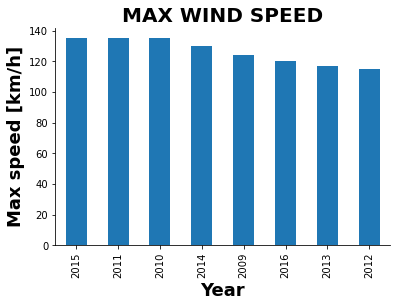

In [20]:
fig_speed_max, ax = plt.subplots()
speed_max.sort_values(ascending = False).plot(kind = 'bar')

sns.despine()

#Title and labels
plt.title('MAX WIND SPEED', fontdict={'fontsize':20, 'fontweight': 'bold'})
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.ylabel('Max speed [km/h]', fontdict={'fontsize':18, 'fontweight': 'bold'})


In [21]:
'''
# Para sacar la imagen para la presentación:
fig_speed_max, ax = plt.subplots()
speed_max.sort_values(ascending = False).plot(kind = 'bar', colormap = 'ocean_r')

sns.despine()

#Title and labels
plt.title('MAX WIND SPEED', fontdict={'fontsize':20, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.xlabel('Year', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.ylabel('Max speed [km/h]', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})

#Spines
ax.spines['bottom'].set_color('lightcyan')
ax.spines['left'].set_color('lightcyan')
ax.tick_params(axis='both', colors='lightcyan')

#fig_speed_max.savefig(fname='../fig_speed_max.png', transparent=True)
'''

"\n# Para sacar la imagen para la presentación:\nfig_speed_max, ax = plt.subplots()\nspeed_max.sort_values(ascending = False).plot(kind = 'bar', colormap = 'ocean_r')\n\nsns.despine()\n\n#Title and labels\nplt.title('MAX WIND SPEED', fontdict={'fontsize':20, 'color': 'lightcyan', 'fontweight': 'bold'})\nplt.xlabel('Year', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})\nplt.ylabel('Max speed [km/h]', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})\n\n#Spines\nax.spines['bottom'].set_color('lightcyan')\nax.spines['left'].set_color('lightcyan')\nax.tick_params(axis='both', colors='lightcyan')\n\n#fig_speed_max.savefig(fname='../fig_speed_max.png', transparent=True)\n"

Ahora, haciendo uso de la librería "calplot", se genera un calendario en el que puede observarse la distribución de esos ráfagas de viento máximo (WindGustSpeed)

(<Figure size 900x979.2 with 9 Axes>,
 array([<AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       dtype=object))

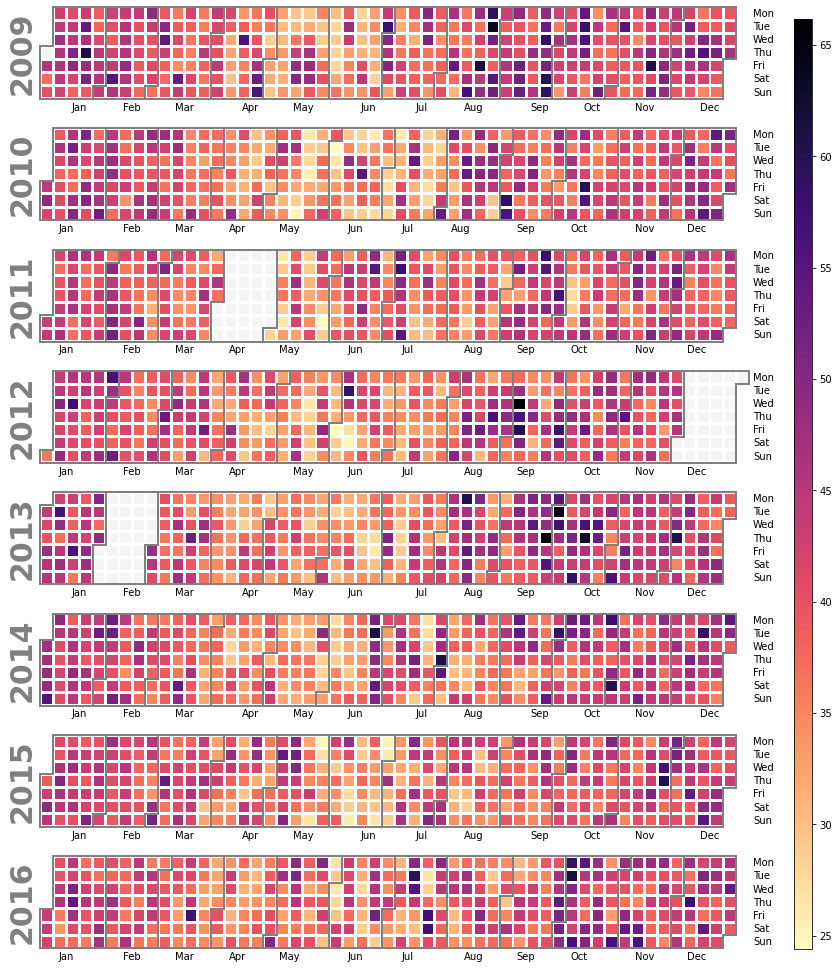

In [38]:
import calplot
calplot.calplot(how = 'mean',data=aus_df.WindGustSpeed, cmap='magma_r', linewidth = 2,colorbar=True)

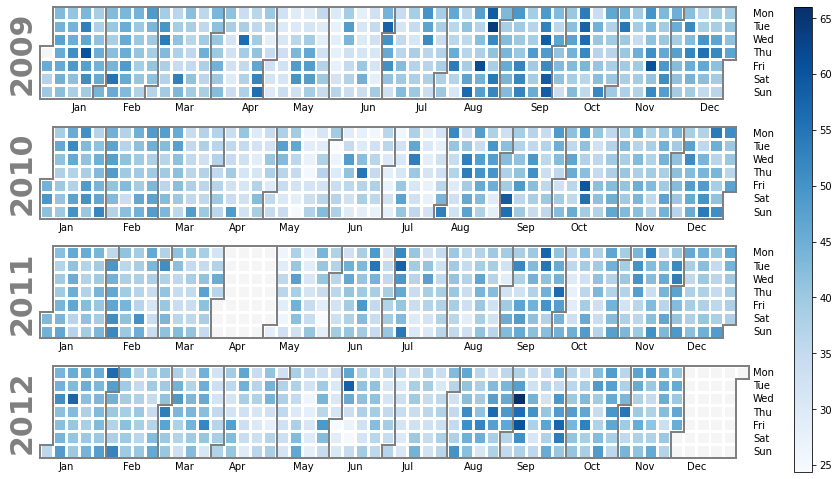

In [39]:

# Para sacar la imagen para la presentación:
fig_wind_1half = calplot.calplot(how = 'mean',data=aus_df.loc[(aus_df.index>'2009') & (aus_df.index<'2013'), 'WindGustSpeed'],
                cmap='Blues', linewidth = 2,colorbar=True, textcolor = 'white');
plt.savefig(fname='../fig_wind_1half.png', transparent=True)


<Figure size 432x288 with 0 Axes>

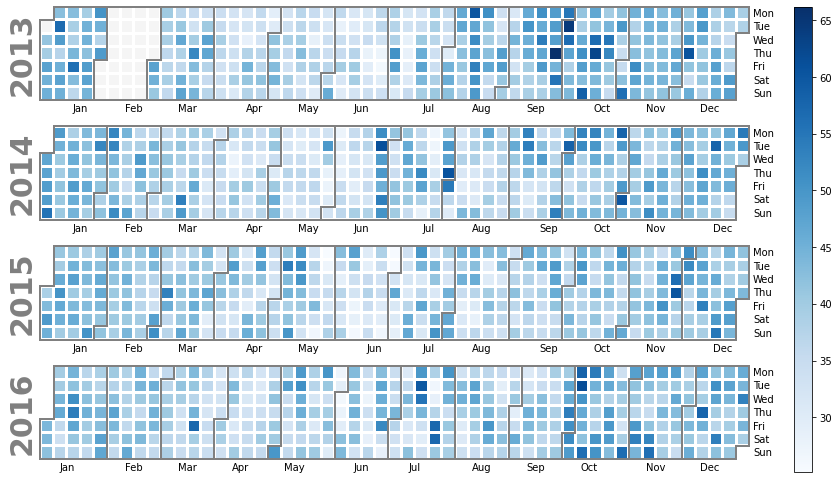

In [40]:

# Para sacar la imagen para la presentación:
fig_wind_2half = plt.figure()
calplot.calplot(how = 'mean',data=aus_df.loc[(aus_df.index>'2013') & (aus_df.index<'2017'), 'WindGustSpeed'],
                cmap='Blues', linewidth = 2,colorbar=True);
plt.savefig(fname='../fig_wind_2half.png', transparent=True)


## 5. Análisis de la Lluvia

En este apartado se analiza el comportamiento de la lluvia en el periodo comprendido entre 2009 y 2016

### 5.1 Zonas con mayor y menor volumen de precipitación

Text(0.5, 0.98, 'AVERAGE RAIN PER LOCATION')

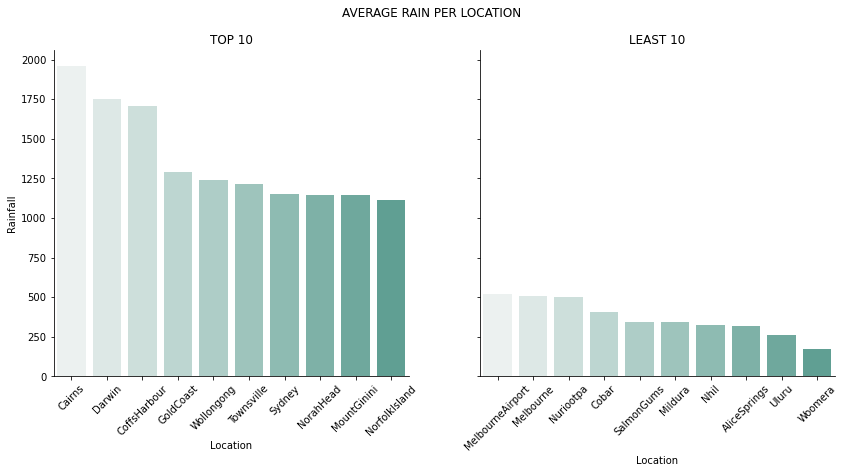

In [25]:
fig_rain_loc, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)

rain_per_loc = aus_df.groupby(['Location', 'Year']).sum().groupby('Location').mean()['Rainfall']
#Para obtener el dataframe de "rain_per_loc" se lleva a cabo una primera agrupación por localización y año y se hace la suma.
#Así se obtiene el agua total caída cada año en cada lugar.
# El dataframe resultante se agrupa de nuevo por localización y se calcula la maedia.
#Así se obtiene la media de volúmen de precipitación por localización en el periodo 2009-2016

ax1=sns.barplot(x = rain_per_loc.sort_values(ascending = False).head(10).index,
           y = rain_per_loc.sort_values(ascending = False).head(10),
               ax=ax1, palette='light:#5A9')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set(title = 'TOP 10')
#ax1 muestra el top 10 de lugares con más lluvias

ax2=sns.barplot(x = rain_per_loc.sort_values(ascending = False).tail(10).index,
           y = rain_per_loc.sort_values(ascending = False).tail(10),
               ax = ax2, palette='light:#5A9')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set(ylabel='', title = 'LEAST 10')
#ax2 muestra el top 10 de lugares con menos lluvias

sns.despine()
fig_rain_loc.suptitle('AVERAGE RAIN PER LOCATION')

In [26]:
'''# Para sacar la imagen para la presentación:
fig_rain_loc, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)

rain_per_loc = aus_df.groupby(['Location', 'Year']).sum().groupby('Location').mean()['Rainfall']
#Para obtener el dataframe de "rain_per_loc" se lleva a cabo una primera agrupación por localización y año y se hace la suma.
#Así se obtiene el agua total caída cada año en cada lugar.
# El dataframe resultante se agrupa de nuevo por localización y se calcula la maedia.
#Así se obtiene la media de volúmen de precipitación por localización en el periodo 2009-2016

ax1=sns.barplot(x = rain_per_loc.sort_values(ascending = False).head(10).index,
           y = rain_per_loc.sort_values(ascending = False).head(10),
               ax=ax1, palette='light:#5A9')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel(xlabel = '')
ax1.set_ylabel(ylabel = 'Rain Fall',fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
ax1.set_title('TOP 10',fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
#ax1 muestra el top 10 de lugares con más lluvias


ax2=sns.barplot(x = rain_per_loc.sort_values(ascending = False).tail(10).index,
           y = rain_per_loc.sort_values(ascending = False).tail(10),
               ax = ax2, palette='light:#5A9')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set(xlabel = '',ylabel='')
ax2.set_title('LEAST 10',fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
#ax2 muestra el top 10 de lugares con menos lluvias


sns.despine()

#Spines
ax1.spines['bottom'].set_color('lightcyan')
ax1.spines['left'].set_color('lightcyan')
ax1.tick_params(axis='both', colors='lightcyan')
ax2.spines['bottom'].set_color('lightcyan')
ax2.spines['left'].set_color('lightcyan')
ax2.tick_params(axis='both', colors='lightcyan')

fig_rain_loc.suptitle('AVERAGE RAIN PER LOCATION', fontdict={'fontsize':20, 'color': 'lightcyan', 'fontweight': 'bold'})
fig_rain_loc.savefig(fname='../fig_rain_loc.png', transparent=True)'''

'# Para sacar la imagen para la presentación:\nfig_rain_loc, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)\n\nrain_per_loc = aus_df.groupby([\'Location\', \'Year\']).sum().groupby(\'Location\').mean()[\'Rainfall\']\n#Para obtener el dataframe de "rain_per_loc" se lleva a cabo una primera agrupación por localización y año y se hace la suma.\n#Así se obtiene el agua total caída cada año en cada lugar.\n# El dataframe resultante se agrupa de nuevo por localización y se calcula la maedia.\n#Así se obtiene la media de volúmen de precipitación por localización en el periodo 2009-2016\n\nax1=sns.barplot(x = rain_per_loc.sort_values(ascending = False).head(10).index,\n           y = rain_per_loc.sort_values(ascending = False).head(10),\n               ax=ax1, palette=\'light:#5A9\')\nax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)\nax1.set_xlabel(xlabel = \'\')\nax1.set_ylabel(ylabel = \'Rain Fall\',fontdict={\'fontsize\':16, \'color\': \'lightcyan\', \'fontweight\': \'bol

### 5.2 Volúmen de Precipitación por año

Text(0, 0.5, 'Average Rain Fall [mm]')

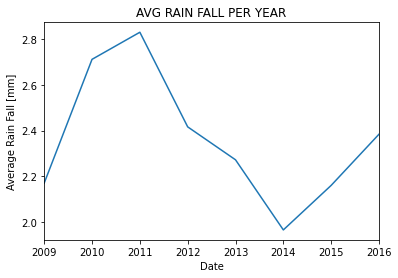

In [27]:
fig_total_rain, ax = plt.subplots()
aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].mean().plot()
ax.set_title('AVG RAIN FALL PER YEAR')
ax.set_ylabel(ylabel = 'Average Rain Fall [mm]')

Text(0, 0.5, 'Total Rain Fall [mm]')

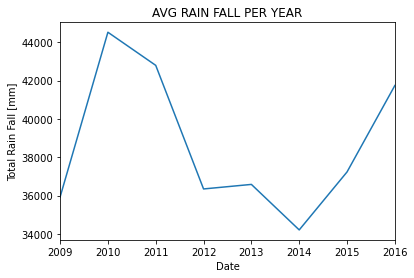

In [41]:
fig_total_rain, ax = plt.subplots()
aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].sum().plot()
ax.set_title('AVG RAIN FALL PER YEAR')
ax.set_ylabel(ylabel = 'Total Rain Fall [mm]')

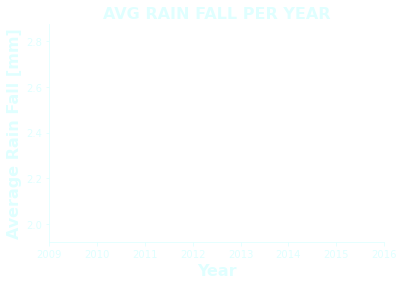

In [28]:
# Para sacar la imagen para la presentación:
fig_total_rain, ax = plt.subplots()

ax = aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].mean().plot(colormap = 'ocean_r')
ax.tick_params(axis='both', colors='lightcyan')
ax.spines['bottom'].set_color('lightcyan')
ax.spines['left'].set_color('lightcyan')
sns.despine()
ax.set_title('AVG RAIN FALL PER YEAR',fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
ax.set_ylabel(ylabel = 'Average Rain Fall [mm]', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
ax.set_xlabel(xlabel = 'Year', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
fig_total_rain.savefig(fname='../fig_total_rain.png', transparent=True)

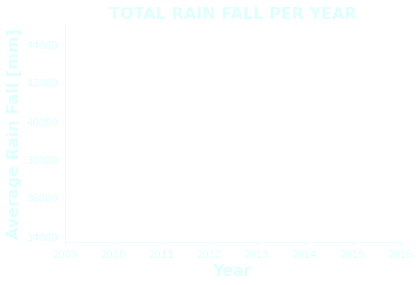

In [42]:
# Para sacar la imagen para la presentación:
fig_total_rain, ax = plt.subplots()

ax = aus_df.groupby(pd.Grouper(level = 'Date', freq = 'A'))['Rainfall'].sum().plot(colormap = 'ocean_r')
ax.tick_params(axis='both', colors='lightcyan')
ax.spines['bottom'].set_color('lightcyan')
ax.spines['left'].set_color('lightcyan')
sns.despine()
ax.set_title('TOTAL RAIN FALL PER YEAR',fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
ax.set_ylabel(ylabel = 'Total Rain Fall [mm]', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
ax.set_xlabel(xlabel = 'Year', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
fig_total_rain.savefig(fname='../fig_total_rain_sum.png', transparent=True)

### 5.3. Distribución de las Lluvias en Australia

(<Figure size 900x979.2 with 9 Axes>,
 array([<AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       dtype=object))

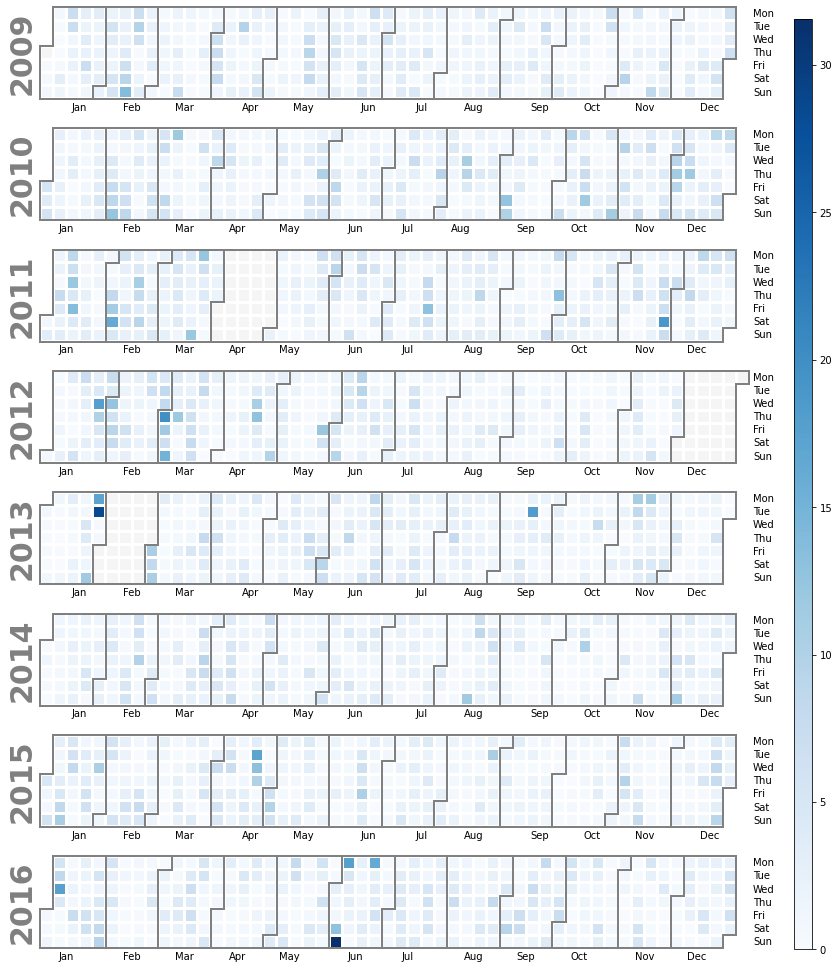

In [43]:
import calplot
calplot.calplot(how = 'mean',data=aus_df.Rainfall, cmap='Blues', linewidth = 2,colorbar=True)

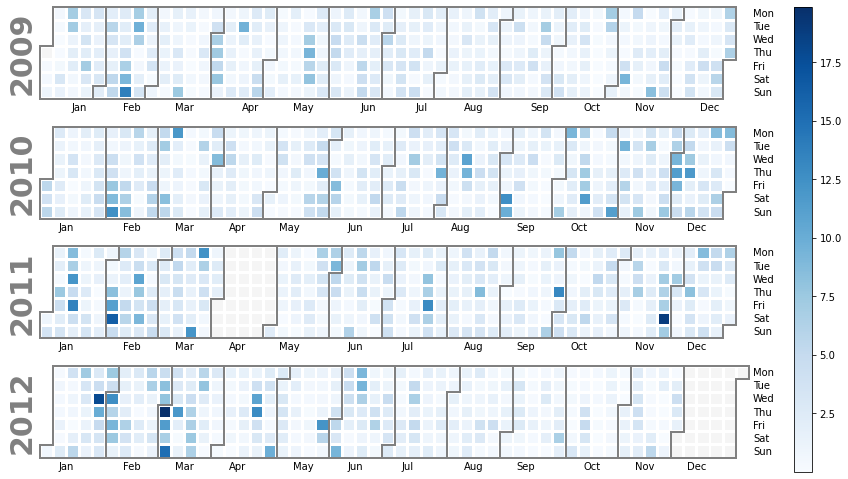

In [44]:
# Para sacar la imagen para la presentación:
fig_rain_1half = calplot.calplot(how = 'mean',
                                 data=aus_df.loc[(aus_df.index>'2009') & (aus_df.index<'2013'), 'Rainfall'],
                                 cmap='Blues', linewidth = 2,colorbar=True, textcolor = 'white');
plt.savefig(fname='../fig_rain_1half.png', transparent=True)

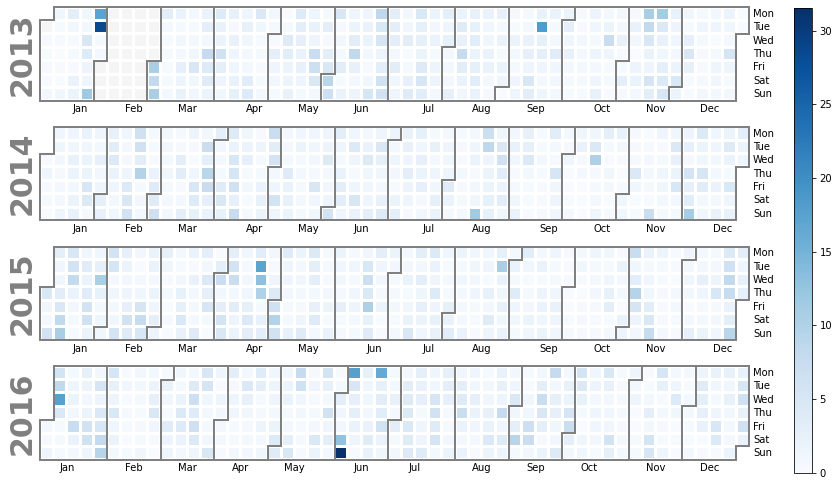

In [45]:
# Para sacar la imagen para la presentación:
fig_rain_2half = calplot.calplot(how = 'mean',
                                 data=aus_df.loc[(aus_df.index>'2013') & (aus_df.index<'2017'), 'Rainfall'],
                                 cmap='Blues', linewidth = 2,colorbar=True, textcolor = 'white');
plt.savefig(fname='../fig_rain_2half.png', transparent=True)

## 6. Análisis de las Temperaturas

En este apartado se analiza la distribución de las temperaruras máximas en Australia en el periodo 2009-2016

(<Figure size 900x979.2 with 9 Axes>,
 array([<AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       dtype=object))

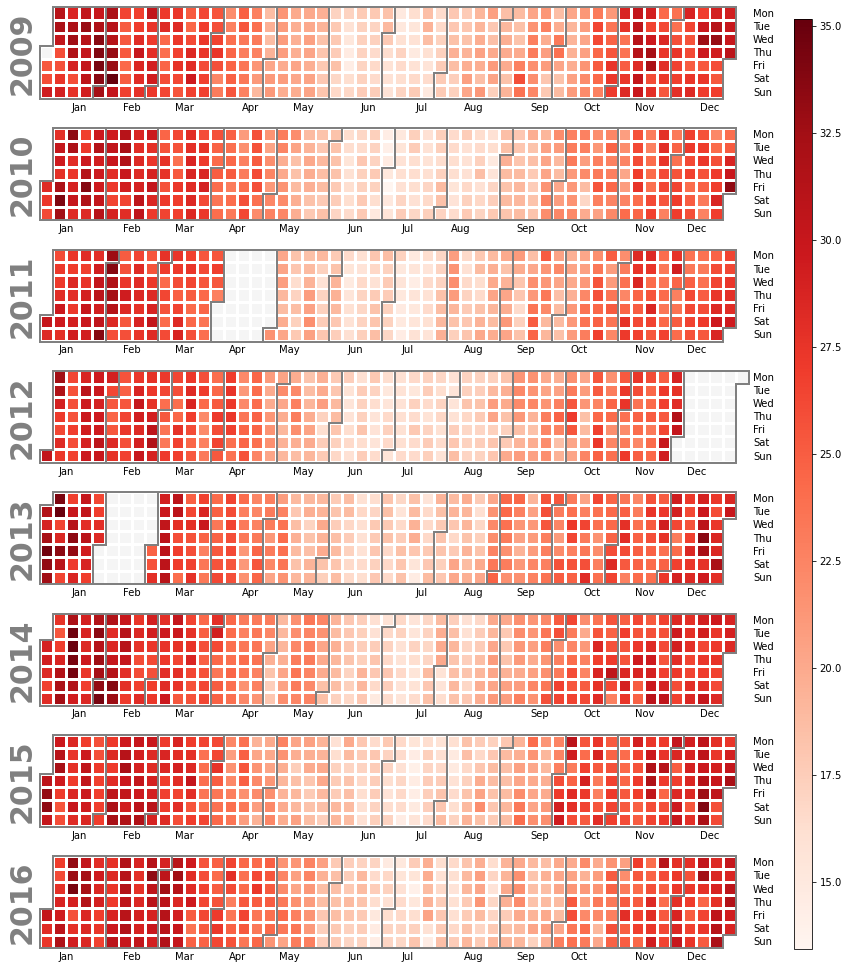

In [46]:
import calplot
calplot.calplot(how = 'mean',data=aus_df.MaxTemp, cmap='Reds', linewidth = 2,colorbar=True)

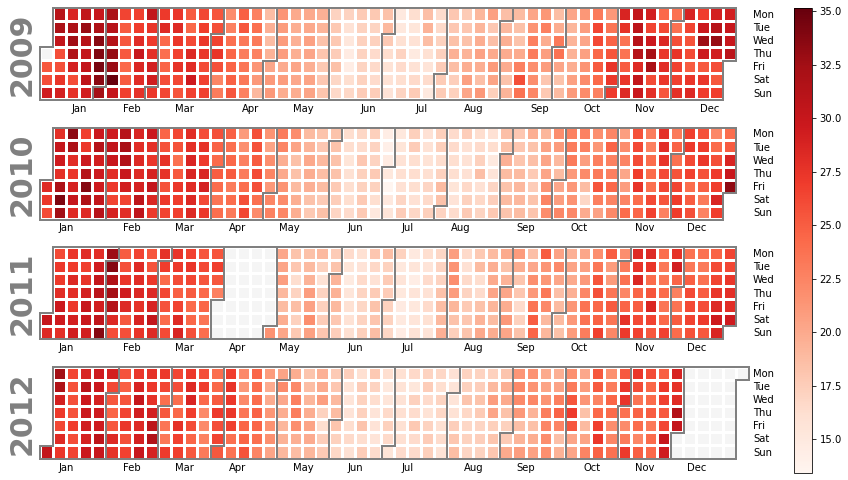

In [49]:
# Para sacar la imagen para la presentación:
fig_temps_1half = calplot.calplot(how = 'mean',
                                 data=aus_df.loc[(aus_df.index>'2009') & (aus_df.index<'2013'), 'MaxTemp'],
                                 cmap='Reds', linewidth = 2,colorbar=True, textcolor = 'white');
plt.savefig(fname='../fig_temps_1half.png', transparent=True)

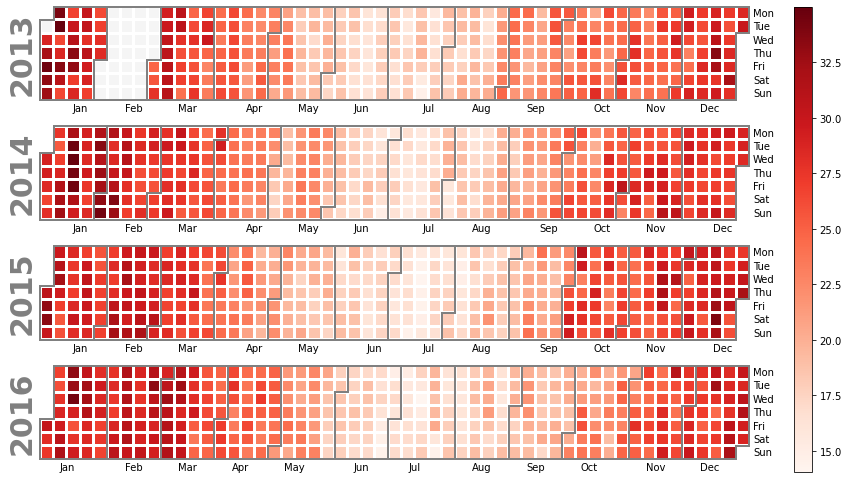

In [50]:
# Para sacar la imagen para la presentación:
fig_temp_2half = calplot.calplot(how = 'mean',
                                 data=aus_df.loc[(aus_df.index>'2013') & (aus_df.index<'2017'), 'MaxTemp'],
                                 cmap='Reds', linewidth = 2,colorbar=True, textcolor = 'white');
plt.savefig(fname='../fig_temp_2half.png', transparent=True)

## 7. Relación Luvia Viento

### 7.1. Wind Speed and Rain Fall Relation

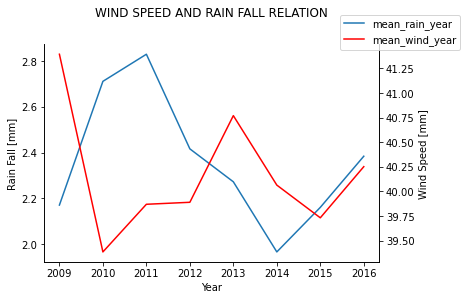

In [35]:
# fig_maxwindspeed_rainfall, ax2 = plt.subplots()

data = pd.DataFrame({'Year': np.array(aus_df.groupby(aus_df.index.year)['WindGustSpeed'].mean().index), #solo indices
                    'mean_rain_year': aus_df.groupby(aus_df.index.year)['Rainfall'].mean(),
                    'mean_wind_year': aus_df.groupby(aus_df.index.year)['WindGustSpeed'].mean()})

#data es un DataFrame que contiene los datos de las medias de la velocidad máxima, de las lluvias, y las direcciones.

ax1 = data.plot(x = 'Year', y = 'mean_rain_year', legend = False)
plt.ylabel('Rain Fall [mm]')
ax2 = ax1.twinx()
data.plot(x = 'Year', y = 'mean_wind_year', ax = ax2, legend = False, color = 'r')
ax1.figure.legend(loc = 1, bbox_to_anchor=(1.1, 1))
sns.despine(right = False)
plt.ylabel('Wind Speed [mm]')
plt.title('WIND SPEED AND RAIN FALL RELATION', y = 1.1)

plt.savefig(fname='../fig_maxwindspeed_rainfall.png', transparent=True)

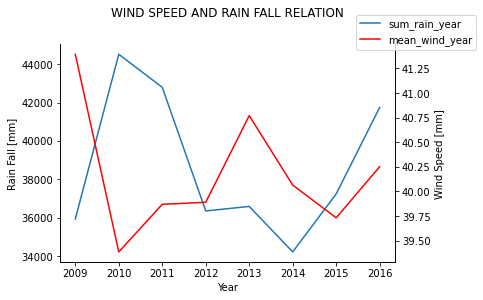

In [37]:
# fig_maxwindspeed_rainfall, ax2 = plt.subplots()

data = pd.DataFrame({'Year': np.array(aus_df.groupby(aus_df.index.year)['WindGustSpeed'].mean().index), #solo indices
                    'sum_rain_year': aus_df.groupby(aus_df.index.year)['Rainfall'].sum(),
                    'mean_wind_year': aus_df.groupby(aus_df.index.year)['WindGustSpeed'].mean()})

#data es un DataFrame que contiene los datos de las medias de la velocidad máxima, la suma de las lluvias, y las direcciones.

ax1 = data.plot(x = 'Year', y = 'sum_rain_year', legend = False)
plt.ylabel('Rain Fall [mm]')
ax2 = ax1.twinx()
data.plot(x = 'Year', y = 'mean_wind_year', ax = ax2, legend = False, color = 'r')
ax1.figure.legend(loc = 1, bbox_to_anchor=(1.1, 1))
sns.despine(right = False)
plt.ylabel('Wind Speed [mm]')
plt.title('WIND SPEED AND RAIN FALL RELATION', y = 1.1)

plt.savefig(fname='../fig_maxwindspeed_rainfall_sum.png', transparent=True)

### 7.2. Rain Fall vs Wind Direction

In [ ]:
fig_windir_rain, ax = plt.subplots(figsize=(14,6))
data = pd.DataFrame({'Wind_dir_max_Speed': aus_df.groupby('WindGustDir').mean()['Rainfall'],
                    'Wind_dir_9am': aus_df.groupby('WindDir9am').mean()['Rainfall'],
                    'Wind_dir_3pm': aus_df.groupby('WindDir3pm').mean()['Rainfall']})
colors = ['darkslategray', 'aqua', 'crimson']
#Colores:
for i in range(data.shape[1]):
    plt.plot(data.iloc[:,i], color = colors[i])

    
plt.title('RAIN FALL vs WIND DIRECTION')
plt.ylabel ('Rain Fall [mm]')
plt.xlabel('Wind Direction')

In [ ]:
'''
This pot shows the relation between the rain fall [mm] and the direction of the wind
Figure with soft colors for the presentation.

'''
#Create figure
fig_windir_rain, ax = plt.subplots(figsize=(14,6))

#Create dataframe to plot the data
data = pd.DataFrame({'Wind_dir_max_Speed': aus_df.groupby('WindGustDir').mean()['Rainfall'],
                    'Wind_dir_9am': aus_df.groupby('WindDir9am').mean()['Rainfall'],
                    'Wind_dir_3pm': aus_df.groupby('WindDir3pm').mean()['Rainfall']})

#Colores:
colors = ['paleturquoise', 'ivory', 'violet']
markers = ['o', 'X', 's']
# Loop to define colors and markers
for i in range(data.shape[1]):
    plt.plot(data.iloc[:,i], color = colors[i], marker = markers[i], linewidth = 3)


# Modify legend
L = plt.legend(labels = ['Maximum Wind Speed Direction', 'Wind Direction 9am', 'Wind Direction 9am'],loc = 'upper left')
L.get_frame().set_alpha(1)
L.get_frame().set_facecolor((0, 0, 0.1, 0.1))
for text in L.get_texts():
     text.set_color("lightcyan")
    
    
# Titles and labels
plt.title('RAIN FALL vs WIND DIRECTION', fontdict={'fontsize':18, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.ylabel ('Rain Fall [mm]', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
plt.xlabel('Wind Direction', fontdict={'fontsize':16, 'color': 'lightcyan', 'fontweight': 'bold'})
sns.despine()


#Spines
ax.spines['bottom'].set_color('lightcyan')

ax.spines['left'].set_color('lightcyan')

ax.tick_params(axis='both', colors='lightcyan',)

plt.tight_layout()

fig_windir_rain.savefig(fname='../fig_windir_rain.png', transparent=True)